In [26]:
import matplotlib.pyplot as plot
import matplotlib.dates as dates
import pydata_google_auth
import pandas as pd
from google.cloud import bigquery
import projectIDContainer

credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)
project_id = projectIDContainer.project_id
# hardcoding the pie chart keys and manually setting the colours to be consistent is really not the way I'd like to handle this
threeColorsArray = ['#FFC6FF', '#CAFFBF', '#FFD6A5'] # tablet, desktop, mobile
threeColorsArray1 = ['#FFC6FF', '#FFD6A5', '#CAFFBF'] # tablet, mobile, desktop
threeColorsArray2 = ['#FFD6A5', '#CAFFBF', '#FFC6FF'] # mobile, desktop, tablet
rainbowArray = ['#FFADAD', '#FFD6A5', '#FDFFB6', '#CAFFBF', '#9BF6FF', '#A0C4FF', '#BDB2FF', '#FFC6FF']
singleColorArray = ["#BDB2FF"]

def runQuery(queryName):
    query = pd.read_gbq(queryName, project_id=project_id, dialect='standard', credentials=credentials)
    print(query)
    return query


  deviceCategory  totalSessions
0         tablet        1931531
1        desktop        6572847
2         mobile        7935801


<AxesSubplot:ylabel='totalSessions'>

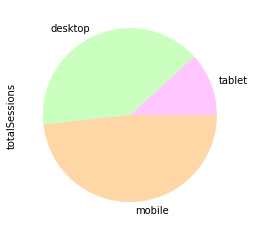

In [29]:
totalSessionsPerDeviceCategory = """
    SELECT deviceCategory, SUM(sessions) AS totalSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY totalSessions ASC
"""
runQuery(totalSessionsPerDeviceCategory).plot.pie(x='deviceCategory', y='totalSessions', colors=threeColorsArray, legend=False, labels=["tablet", "desktop", "mobile"])


     channelGrouping  totalSessions
0         Newsletter         106582
1            Display         122714
2            (Other)         154333
3        Retargeting         209782
4       Email alerts         298831
5        Aggregators         537797
6        Paid Search         673125
7             Social         677312
8   Partner referral         702044
9              Email         891855
10          Referral        2564612
11            Direct        2854506
12    Organic Search        6646686


<AxesSubplot:xlabel='channelGrouping'>

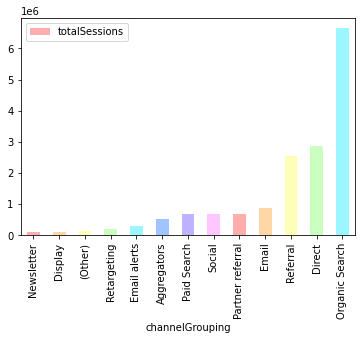

In [30]:
totalSessionsPerChannelGrouping = """
    SELECT channelGrouping, SUM(sessions) AS totalSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY channelGrouping
    ORDER BY totalSessions ASC
"""
runQuery(totalSessionsPerChannelGrouping).plot.bar(x='channelGrouping', y='totalSessions', color=rainbowArray)


    formattedDate  numberOfSessions
0      2017-01-01             17367
1      2017-01-02             27842
2      2017-01-03             42792
3      2017-01-04             42956
4      2017-01-05             43019
..            ...               ...
500    2018-05-16             32012
501    2018-05-17             26716
502    2018-05-18             22831
503    2018-05-19             14260
504    2018-05-20             17993

[505 rows x 2 columns]
   formattedDate  numberOfSessions
0     2017-07-01             19587
1     2017-07-02             24581
2     2017-07-03             44487
3     2017-07-04              2991
4     2017-07-05               392
5     2017-07-06               250
6     2017-07-07               184
7     2017-07-08               141
8     2017-07-09               117
9     2017-07-10               104
10    2017-07-11             35297
11    2017-07-12             35401
12    2017-07-13             32989
13    2017-07-14             27177
14    2017-07-15   

,date,channelGrouping,deviceCategory,sessions,conversions
0,20170703,(Other),mobile,81,1
1,20170703,(Other),tablet,16,1
2,20170703,Aggregators,mobile,86,2
3,20170703,Aggregators,tablet,32,2
4,20170703,Retargeting,tablet,42,2
...,...,...,...,...,...
198,20170711,Direct,desktop,2424,75
199,20170711,Referral,desktop,2444,97
200,20170711,Organic Search,desktop,6013,366
201,20170711,Direct,mobile,3613,114


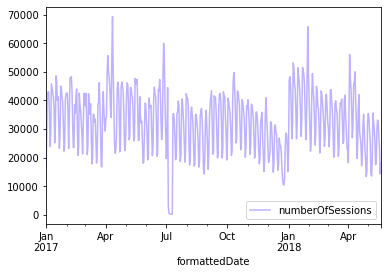

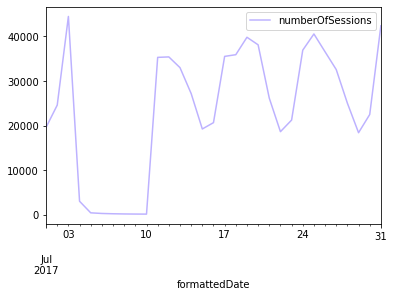

In [31]:
# TODO: check totalSessions/numberOfSessions naming for consistency
totalSessionsPerDay = """
    SELECT DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
            CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
            CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS formattedDate, 
        SUM(sessions) AS numberOfSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY formattedDate
    ORDER BY formattedDate ASC
"""
runQuery(totalSessionsPerDay).plot.line(x='formattedDate', y='numberOfSessions', color=singleColorArray)

totalSessionsPerDayForJuly2017 = """
    SELECT DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
            CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
            CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS formattedDate, 
        SUM(sessions) AS numberOfSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    WHERE CAST(date AS string) LIKE '201707%'
    GROUP BY formattedDate
    ORDER BY formattedDate ASC
"""
runQuery(totalSessionsPerDayForJuly2017).plot.line(x='formattedDate', y='numberOfSessions', color=singleColorArray)

totalSessionsPerDayDuringDip = """
    SELECT *
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    WHERE date>=20170703 AND date<=20170711
    ORDER BY date ASC
"""
runQuery(totalSessionsPerDayDuringDip)


  deviceCategory  averageConversions
0         tablet                20.4
1         mobile                38.6
2        desktop                53.7


<AxesSubplot:ylabel='averageConversions'>

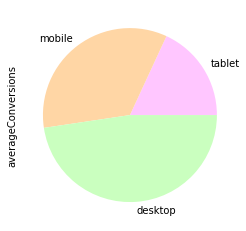

In [32]:
averageConversionsPerDeviceCategory = """
    SELECT deviceCategory, ROUND(AVG(conversions), 1) as averageConversions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY averageConversions
"""
runQuery(averageConversionsPerDeviceCategory).plot.pie(y='averageConversions', colors=threeColorsArray1, legend=False, labels=["tablet", "mobile", "desktop"])


  deviceCategory  conversionRate
0         mobile          0.0261
1        desktop          0.0430
2         tablet          0.0551


<AxesSubplot:ylabel='conversionRate'>

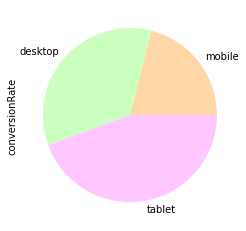

In [33]:
conversionRatePerDeviceCategory = """
    SELECT deviceCategory, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY conversionRate
"""
runQuery(conversionRatePerDeviceCategory).plot.pie(x='deviceCategory', y='conversionRate', normalize=True, colors=threeColorsArray2, legend=False, labels=["mobile", "desktop", "tablet"])


     channelGrouping  conversionRate
0             Social          0.0287
1            (Other)          0.0344
2         Newsletter          0.0350
3        Paid Search          0.0350
4             Direct          0.0354
5              Email          0.0357
6        Aggregators          0.0358
7       Email alerts          0.0358
8     Organic Search          0.0368
9           Referral          0.0370
10       Retargeting          0.0387
11  Partner referral          0.0399
12           Display          0.0444


<AxesSubplot:xlabel='channelGrouping'>

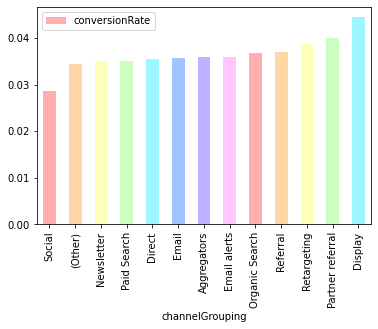

In [34]:
conversionRatePerChannelGrouping = """
    SELECT channelGrouping, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY channelGrouping
    ORDER BY conversionRate
"""
runQuery(conversionRatePerChannelGrouping).plot.bar(x='channelGrouping', y='conversionRate', color=rainbowArray)


    formattedDate  conversionRate
0      2017-01-01          0.0313
1      2017-01-02          0.0308
2      2017-01-03          0.0372
3      2017-01-04          0.0317
4      2017-01-05          0.0400
..            ...             ...
500    2018-05-16          0.0399
501    2018-05-17          0.0345
502    2018-05-18          0.0390
503    2018-05-19          0.0342
504    2018-05-20          0.0382

[505 rows x 2 columns]


<AxesSubplot:xlabel='formattedDate'>

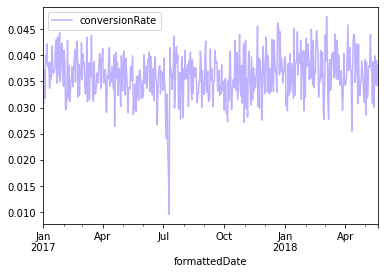

In [35]:
conversionRateOverTime = """
    SELECT DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
            CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
            CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS formattedDate, 
        ROUND((AVG(conversions))/(AVG(sessions)), 4) AS conversionRate
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY formattedDate
    ORDER BY formattedDate ASC
"""
runQuery(conversionRateOverTime).plot.line(x='formattedDate', y='conversionRate', color=singleColorArray)


    formattedDate  totalConversions
0      2017-01-01               544
1      2017-01-02               857
2      2017-01-03              1590
3      2017-01-04              1361
4      2017-01-05              1719
..            ...               ...
500    2018-05-16              1278
501    2018-05-17               922
502    2018-05-18               891
503    2018-05-19               488
504    2018-05-20               688

[505 rows x 2 columns]


<AxesSubplot:xlabel='formattedDate'>

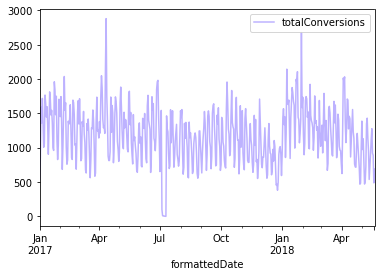

In [36]:
totalConversionsOverTime = """
    SELECT DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
            CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
            CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS formattedDate,
        SUM(conversions) AS totalConversions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    GROUP BY formattedDate
    ORDER BY formattedDate ASC
"""
runQuery(totalConversionsOverTime).plot.line(x='formattedDate', y='totalConversions', color=singleColorArray)


   conversionRateFor2017
0                 0.0359
   conversionRateFor2018
0                  0.037


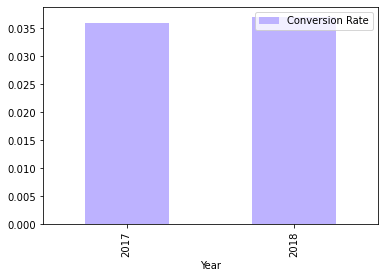

In [20]:
conversionRate2017 = """
    SELECT ROUND((AVG(conversions))/(AVG(sessions)), 4) AS conversionRateFor2017
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    WHERE date<20180000
"""
conversionRateFor2017 = runQuery(conversionRate2017).squeeze()

conversionRate2018 = """
    SELECT ROUND((AVG(conversions))/(AVG(sessions)), 4) AS conversionRateFor2018
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    WHERE date>20180000
"""
conversionRateFor2018 = runQuery(conversionRate2018).squeeze()

data = {"Year":[2017, 2018], "Conversion Rate":[conversionRateFor2017, conversionRateFor2018]};
dataFrame= pd.DataFrame(data=data)
dataFrame.plot.bar(x="Year", y="Conversion Rate", color=singleColorArray)
plot.show(block=True)


     channelGrouping  totalSessions
0         Newsletter           9286
1            (Other)          17554
2        Retargeting          19223
3       Email alerts          26404
4            Display          32090
5             Social          37776
6        Aggregators          47826
7   Partner referral          83018
8              Email          86646
9        Paid Search          94330
10            Direct         277229
11          Referral         342738
12    Organic Search         857411
     channelGrouping  totalSessions
0         Newsletter          27405
1             Social          37549
2            (Other)          52708
3            Display          75258
4        Retargeting         113498
5       Email alerts         122579
6        Aggregators         178839
7        Paid Search         189047
8              Email         346521
9   Partner referral         458034
10          Referral         992834
11            Direct        1040719
12    Organic Search        

<AxesSubplot:xlabel='channelGrouping'>

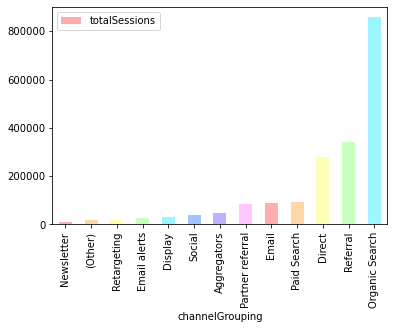

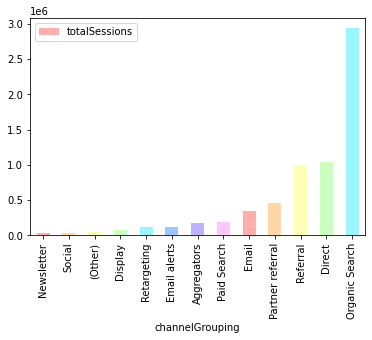

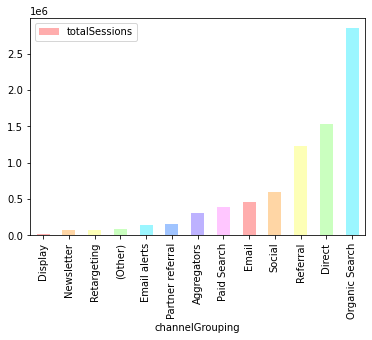

In [37]:
numberOfSessionsPerChannelGroupingForTablet = """
    SELECT channelGrouping, SUM(sessions) as totalSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    WHERE deviceCategory="tablet"
    GROUP BY deviceCategory, channelGrouping
    ORDER BY totalSessions
"""
runQuery(numberOfSessionsPerChannelGroupingForTablet).plot.bar(x='channelGrouping', y='totalSessions', color=rainbowArray)

numberOfSessionsPerChannelGroupingForDesktop = """
    SELECT channelGrouping, SUM(sessions) as totalSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    WHERE deviceCategory="desktop"
    GROUP BY deviceCategory, channelGrouping
    ORDER BY totalSessions
"""
runQuery(numberOfSessionsPerChannelGroupingForDesktop).plot.bar(x='channelGrouping', y='totalSessions', color=rainbowArray)

numberOfSessionsPerChannelGroupingForMobile = """
    SELECT channelGrouping, SUM(sessions) as totalSessions
    FROM """ + projectIDContainer.project_id + """
    .sample_data.datatable
    WHERE deviceCategory="mobile"
    GROUP BY deviceCategory, channelGrouping
    ORDER BY totalSessions
"""
runQuery(numberOfSessionsPerChannelGroupingForMobile).plot.bar(x='channelGrouping', y='totalSessions', color=rainbowArray)
